In [6]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.feature_extraction.text import TfidfVectorizer
import difflib
from sklearn.metrics.pairwise import cosine_similarity

In [7]:
# data cleaning and preprocessing

In [8]:
data = pd.read_csv("movies.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
# Number of Rows and Columns in the frame
data.shape

(8809, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [11]:
# Validating the duplicates record in the dataset
data.duplicated().sum()

0

In [12]:
# Validating the null record in the dataset
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

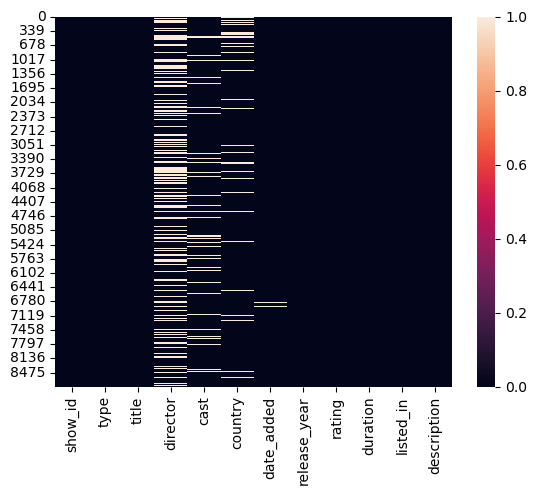

In [13]:
# Visualizing the null record in the dataset
sn.heatmap(data.isnull())

In [14]:
# Feature selection of the dataset
feature_selection = ["type","title","director","cast","description"]
print(feature_selection)

['type', 'title', 'director', 'cast', 'description']


In [15]:
# Replacing null value with null string

for i in feature_selection:
    data[feature_selection] = data[feature_selection].fillna('')
    
 
data[feature_selection]   

,type,title,director,cast,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,,,"Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",In a city of coaching centers known to train I...
...,...,...,...,...,...
8804,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",Looking to survive in a world taken over by zo...
8805,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Dragged from civilian life, a former superhero..."
8806,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",A scrappy but poor boy worms his way into a ty...
8807,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",A new breed of parasitic aliens arrive on Eart...


In [16]:
concetValue = data['type']+" "+data['title']+" "+ data['director']+ " "+data['cast']+ " " +data['description']
concetValue

0       Movie Dick Johnson Is Dead Kirsten Johnson  As...
1       TV Show Blood & Water  Ama Qamata, Khosi Ngema...
2       TV Show Ganglands Julien Leclercq Sami Bouajil...
3       TV Show Jailbirds New Orleans   Feuds, flirtat...
4       TV Show Kota Factory  Mayur More, Jitendra Kum...
                              ...                        
8804    Movie Zombieland Ruben Fleischer Jesse Eisenbe...
8805    Movie Zoom Peter Hewitt Tim Allen, Courteney C...
8806    Movie Zubaan Mozez Singh Vicky Kaushal, Sarah-...
8807    TV Show Parasyte: The Grey Yeon Sang-ho Shin H...
8808    Movie Serena Susanne Bier Bradley Cooper, Jenn...
Length: 8809, dtype: object

In [46]:
# Convert text into numerical vectors

vectorizer = TfidfVectorizer(stop_words='english')
convertmatrix = vectorizer.fit_transform(concetValue)


In [47]:
#compute cosine similarity between all movies

cosine_sim = cosine_similarity(convertmatrix)


In [57]:
# Checking title speliing in the list

listMovie = data['title'].tolist()

def correct_title(title):
    match = difflib.get_close_matches(title,listMovie)
    return match[0] if match else None

In [82]:
# Create function to recommend 

def recomm_movie(title,data,cosine_sim):
    
    #correct spelling 
    correcTitle = correct_title(title)
    print(correcTitle)
    if not correcTitle:
        return "Not found"    
    
    #get index of movie that matches the title
    idx = data[data["title"] == correcTitle].index[0]
    
    #Get similarity score of all move with given movie
    sim_score = list(enumerate(cosine_sim[idx]))
    
    #Sort movies based on similarity score (highest first)
    sim_score = sorted(sim_score ,key=lambda x: x[1], reverse =True)
    
    #Get top 3 most similar movies (excluding the input movies)
    top_movies = sim_score[1:4]
    
    #Get movie titles
    recomm_title = [data.iloc[i[0]]["title"] for i in top_movies]
    return recomm_title


In [84]:
# Make system

movie_search = 'Iron'
recomMovie = recomm_movie(movie_search,data,cosine_sim)
print(recomMovie)

Iverson
['Dance Dreams: Hot Chocolate Nutcracker', 'Tim Allen: ReWires America', 'Tim Allen: Men Are Pigs']
